In [282]:
import pandas as pd 

In [284]:
data = pd.read_csv("email.csv") # load csv
data


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


📄 Dataset Overview: email.csv
This dataset contains labeled text messages and is used for binary text classification — specifically, to distinguish between spam and ham (non-spam) messages.

📋 Columns:
label:

Type of message

'spam' for unwanted or promotional messages

'ham' for normal/legitimate messages

message:

The actual content of the text/email message in plain text

🎯 Objective:
The goal is to use this dataset to build a machine learning model that can automatically detect whether a new incoming message is spam or not based on its content.



In [287]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [289]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [291]:
data.columns.tolist()

['Category', 'Message']

In [293]:
data.columns = data.columns.str.strip()


In [295]:
print(data['Category'].unique())


['ham' 'spam' '{"mode":"full"']


In [297]:
#  Strip spaces and convert to lowercase
data['Category'] = data['Category'].astype(str).str.strip().str.lower()

# Step 2: Keep only valid labels
data = data[data['Category'].isin(['ham', 'spam'])]

In [299]:
#convert labels to binary
data["Category"]= data["Category"].map({"ham":0,"spam":1})
X = data['Message'] # feature
y = data['Category']


C:\Users\svjic\AppData\Local\Temp\ipykernel_15272\389611904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Category"]= data["Category"].map({"ham":0,"spam":1})


In [301]:
print(data['Category'].unique())

[0 1]


<h4>Train-Test Split</h4>

In [304]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h4>Text Vectorization (Bag of Words)</h4>

In [307]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

<h4>Train Naive Bayes Model</h4>

In [310]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Train Model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

#  Evaluate
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 Accuracy: 0.9919282511210762
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Confusion Matrix:
 [[966   0]
 [  9 140]]


<h4>Histogram of Spam vs Ham</h4> 

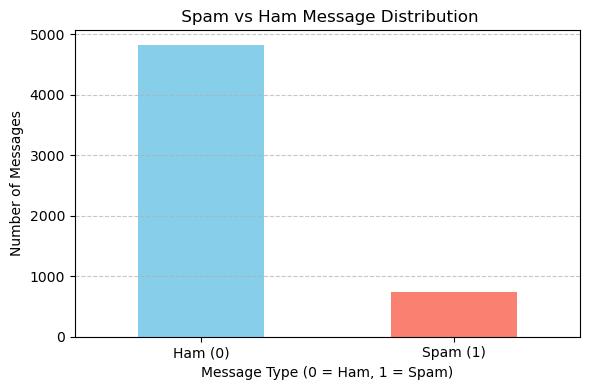

In [313]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(6, 4))
data['Category'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'])

# Labeling
plt.title(' Spam vs Ham Message Distribution')
plt.xlabel('Message Type (0 = Ham, 1 = Spam)')
plt.ylabel('Number of Messages')
plt.xticks([0, 1], ['Ham (0)', 'Spam (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()
